In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
data = load_iris()

In [40]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

 Access feature names and target names

In [42]:
feature_names = data.feature_names
target_names = data.target_names

# Create a DataFrame from the attribute data

In [43]:
data_df = pd.DataFrame(data.data, columns=feature_names)

# Add the target values as a new column

In [44]:
data_df["target"] = data.target
data_df["flower_name"] = data_df.target.apply(lambda x: target_names[x])

# Visualize the Data

<Axes: xlabel='Sepal Length', ylabel='Sepal Width'>

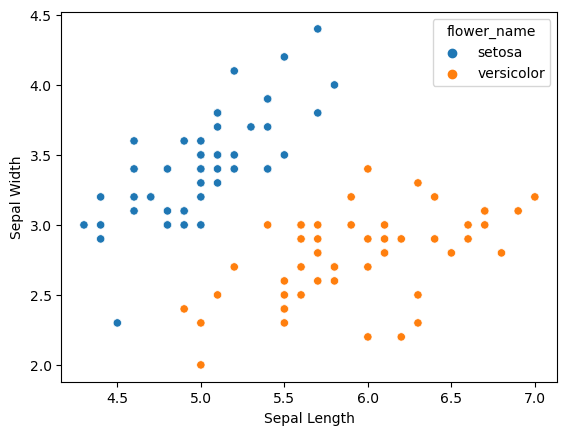

In [47]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width') 
sn.scatterplot(data_df[:100],x='sepal length (cm)',y='sepal width (cm)',hue="flower_name")

# Split data into features (x) and target (y)

In [30]:
x = data_df.drop(["target", "flower_name"], axis="columns")
y = data_df.target

# Split data into training and testing sets

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create and train a KNN classifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Evaluate the classifier on the test set

In [33]:
y_pred = knn.predict(x_test)

# confussion matrix

Text(58.222222222222214, 0.5, 'Truth')

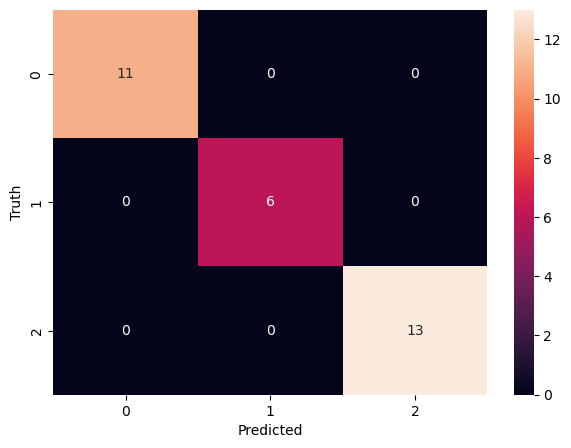

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate accuracy

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Generate a classification report

In [36]:
class_report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

